In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import os
from collections import Counter
import requests
import json

# Google API Key
from api_keys import gkey

In [3]:
#setting background of figure black
plt.style.use('ggplot')

In [4]:
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

## Looking for 2012 US census data

In [5]:
# 2012 census data for all US zipcodes
#reading 2012 combined census data
path_comb_2012=os.path.join('output_census', 'census_comb_2012.csv')
usa_2012=pd.read_csv(path_comb_2012)

In [6]:
#looking for usa_2012 dataframe
usa_2012.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,2655,3846.0,54.6,73323.0,50951.0,5.460218,4.056162,443500.0,1971.0,2566.0,...,96.515861,0.780031,1.586063,0.000000,Osterville,Barnstable County,41.630,-70.3900,3053.0,MA
1,2657,2974.0,52.9,46031.0,45142.0,14.122394,8.675185,467100.0,1945.0,2118.0,...,89.845326,5.749832,2.958978,0.638870,Provincetown,Barnstable County,42.050,-70.1800,4494.0,MA
2,2659,741.0,61.0,51466.0,36133.0,5.668016,4.183536,469800.0,1972.0,2082.0,...,95.546559,2.564103,2.564103,0.000000,South Chatham,Barnstable County,41.680,-70.0200,1297.0,MA
3,2660,5881.0,51.3,48617.0,28784.0,13.977215,2.941677,342800.0,1976.0,1685.0,...,89.899677,6.869580,0.850196,0.170039,South Dennis,Barnstable County,41.710,-70.1500,4551.0,MA
4,2663,96.0,34.7,21667.0,18307.0,0.000000,16.666667,1000001.0,1959.0,-666666666.0,...,100.000000,0.000000,0.000000,0.000000,South Wellfleet,Barnstable County,41.915,-70.0267,412.0,MA


In [7]:
#columns of 2012  dataframe
usa_2012.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [8]:
#shape of the dataframe
usa_2012.shape

(33120, 30)

In [9]:
#removing the rows with house value less than 1
usa_2012=usa_2012[usa_2012['House Value']>0]

In [10]:
#looking for null value
usa_2012.isna().sum()

Zipcode                         0
Population                      0
Median Age                      0
Household Income                0
Per Capita Income              30
Poverty Rate                    0
Unemployment Rate               0
House Value                     0
House Construction Year         0
Monthly Owner Cost              0
Monthly Rent                    0
Public Transport Rate          61
Personal Transport Rate        61
Commute Time Public         22575
Commute Time Car            22575
High School Rate                0
College Rate                    0
Uneducated Rate                 0
English Language Rate           0
Spanish Language Rate           0
White Population Rate           0
Black Population Rate           0
Hispanic Population Rate        0
Asian Population Rate           0
City                            0
County                          1
Lat                            16
Lng                            16
Housing_units                  16
State         

In [11]:
#removing the rows with lat and lng missing value
usa_2012.dropna(subset=['Lat', 'Lng', 
                        'Public Transport Rate',
                        'Personal Transport Rate','Per Capita Income'], 
                         inplace=True)

In [12]:
#shape of the clean dataframe
usa_2012.shape

(31826, 30)

In [13]:
#info of the dataframe
usa_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31826 entries, 0 to 33119
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   31826 non-null  int64  
 1   Population                31826 non-null  float64
 2   Median Age                31826 non-null  float64
 3   Household Income          31826 non-null  float64
 4   Per Capita Income         31826 non-null  float64
 5   Poverty Rate              31826 non-null  float64
 6   Unemployment Rate         31826 non-null  float64
 7   House Value               31826 non-null  float64
 8   House Construction Year   31826 non-null  float64
 9   Monthly Owner Cost        31826 non-null  float64
 10  Monthly Rent              31826 non-null  float64
 11  Public Transport Rate     31826 non-null  float64
 12  Personal Transport Rate   31826 non-null  float64
 13  Commute Time Public       9279 non-null   float64
 14  Commut

In [14]:
#describing the dataframe
usa_2012.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language Rate,Spanish Language Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,31826.000000,31826.000000,31826.000000,3.182600e+04,31826.000000,31826.000000,31826.000000,3.182600e+04,3.182600e+04,3.182600e+04,...,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000,31826.000000
mean,49642.068340,9783.326400,41.361978,-9.479516e+04,25959.995287,14.385606,4.196573,1.729524e+05,-5.636065e+05,-2.230748e+07,...,0.679073,83.886507,6.217975,84.371987,7.521715,8.606317,1.905372,38.879071,-90.968148,4177.419594
std,27441.943504,13942.554997,8.025813,9.886912e+06,11526.060488,10.698924,2.978369,1.448829e+05,1.940990e+07,1.198973e+08,...,1.120986,16.013930,12.710102,20.578434,15.888791,16.186346,5.041010,5.325795,15.032225,5636.402749
min,602.000000,7.000000,0.000000,-6.666667e+08,2290.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.960000,-173.000000,1.000000
25%,27007.500000,827.000000,36.400000,3.791700e+04,19343.000000,6.896552,2.453540,8.500000e+04,1.960000e+03,9.430000e+02,...,0.000000,81.531852,0.366645,79.115540,0.000000,0.434800,0.000000,35.480000,-97.167500,426.000000
50%,49823.500000,3066.500000,40.900000,4.740900e+04,23583.500000,12.164536,3.859775,1.260000e+05,1.973000e+03,1.169000e+03,...,0.389271,89.249721,1.675129,93.069549,0.844211,2.528842,0.244256,39.570000,-88.220000,1457.000000
75%,71944.750000,13697.750000,45.700000,6.037500e+04,29401.000000,19.135679,5.479857,2.043000e+05,1.981000e+03,1.564000e+03,...,0.887574,92.769656,5.441167,97.829703,6.149300,8.204702,1.519418,42.170000,-80.270000,5977.000000
max,99929.000000,115538.000000,91.500000,2.500010e+05,264393.000000,100.000000,61.290323,1.000001e+06,2.006000e+03,4.001000e+03,...,34.536082,100.000000,100.000000,100.000000,100.000000,100.000000,70.586701,71.000000,0.000000,47617.000000


## Looking for 2012 California census data

In [15]:
#reading 2012 combined california census data
path_ca_2012=os.path.join('output_census', 'census_ca_2012.csv')
ca_2012=pd.read_csv(path_ca_2012)

In [16]:
#looking for ca_2012 dataframe
ca_2012.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,54480.0,26.5,35658.0,11452.0,30.473568,4.495228,263100.0,1950.0,1650.0,...,69.799927,9.117107,89.864170,0.150514,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,48613.0,25.4,32299.0,11323.0,32.371999,3.762368,238300.0,1952.0,1801.0,...,59.214613,27.157345,71.927262,0.154280,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,67226.0,26.5,29174.0,10041.0,38.724601,5.703151,248400.0,1951.0,1834.0,...,37.219231,25.806979,72.635587,0.191890,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,62884.0,35.5,38430.0,26497.0,22.566949,7.552001,818400.0,1950.0,3636.0,...,34.245595,3.003944,50.025444,26.238789,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39592.0,34.0,32086.0,18688.0,26.581128,6.483633,664400.0,1954.0,3150.0,...,23.262275,5.698121,55.094464,30.703172,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [17]:
#columns of 2012  dataframe
ca_2012.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [18]:
#shape of the dataframe
ca_2012.shape

(1763, 30)

In [19]:
#removing the rows with house value less than 1
ca_2012=ca_2012[ca_2012['House Value']>0]

In [20]:
#looking for null value
ca_2012.isna().sum()

Zipcode                        0
Population                     0
Median Age                     0
Household Income               0
Per Capita Income              2
Poverty Rate                   0
Unemployment Rate              0
House Value                    0
House Construction Year        0
Monthly Owner Cost             0
Monthly Rent                   0
Public Transport Rate         10
Personal Transport Rate       10
Commute Time Public         1072
Commute Time Car            1072
High School Rate               0
College Rate                   0
Uneducated Rate                0
English Language Rate          0
Spanish Language Rate          0
White Population Rate          0
Black Population Rate          0
Hispanic Population Rate       0
Asian Population Rate          0
City                           0
County                         0
Lat                            0
Lng                            0
Housing_units                  0
State                          0
dtype: int

In [21]:
#removing the rows with lat and lng missing value
ca_2012.dropna(subset=['Public Transport Rate',
                        'Personal Transport Rate'], inplace=True)

In [22]:
#shape of the clean dataframe
ca_2012.shape

(1661, 30)

In [23]:
#info of the dataframe
ca_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1661 entries, 0 to 1762
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1661 non-null   int64  
 1   Population                1661 non-null   float64
 2   Median Age                1661 non-null   float64
 3   Household Income          1661 non-null   float64
 4   Per Capita Income         1661 non-null   float64
 5   Poverty Rate              1661 non-null   float64
 6   Unemployment Rate         1661 non-null   float64
 7   House Value               1661 non-null   float64
 8   House Construction Year   1661 non-null   float64
 9   Monthly Owner Cost        1661 non-null   float64
 10  Monthly Rent              1661 non-null   float64
 11  Public Transport Rate     1661 non-null   float64
 12  Personal Transport Rate   1661 non-null   float64
 13  Commute Time Public       589 non-null    float64
 14  Commute 

In [24]:
#describing the dataframe
ca_2012.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language Rate,Spanish Language Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1.661000e+03,1.661000e+03,1.661000e+03,...,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,93651.845274,22427.682721,39.552619,62480.243227,31030.651415,14.839632,5.481387,4.009178e+05,-1.202125e+06,-1.886197e+07,...,1.253537,63.248684,20.400545,71.489661,4.195534,29.252156,9.010524,36.407824,-119.922962,8227.128838
std,1811.364784,21448.347234,9.100342,28095.991635,16935.055473,10.441389,3.247291,2.402756e+05,2.831549e+07,1.105788e+08,...,1.630572,22.978126,19.889724,19.538382,7.325463,24.328342,12.315637,2.429310,2.130534,7253.220012
min,90001.000000,29.000000,16.700000,2499.000000,6234.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,1.746217,0.000000,5.793502,0.000000,0.000000,0.000000,32.550000,-124.300000,37.000000
25%,92257.000000,2243.000000,32.800000,42490.000000,19916.000000,7.335053,3.861154,2.203000e+05,1.964000e+03,1.618000e+03,...,0.181512,46.967032,5.365854,59.477779,0.387066,10.176991,0.977298,34.060000,-121.890000,1224.000000
50%,93653.000000,18071.000000,38.300000,56651.000000,26968.000000,12.332370,5.155483,3.412000e+05,1.974000e+03,2.121000e+03,...,0.822137,66.412482,13.082854,75.543478,1.813759,21.320922,4.203354,36.720000,-120.090000,7007.000000
75%,95370.000000,36528.000000,45.000000,76612.000000,37851.000000,19.935639,6.758008,5.337000e+05,1.981000e+03,2.694000e+03,...,1.786183,82.403231,30.522009,86.731323,4.752458,43.546284,11.562392,38.247000,-118.070000,13601.000000
max,96161.000000,105603.000000,76.200000,224423.000000,167439.000000,75.862069,51.666667,1.000001e+06,2.005000e+03,4.001000e+03,...,31.818182,100.000000,86.434109,100.000000,86.251343,100.000000,70.586701,41.940000,-114.300000,37182.000000


## Plotting 2012 california data

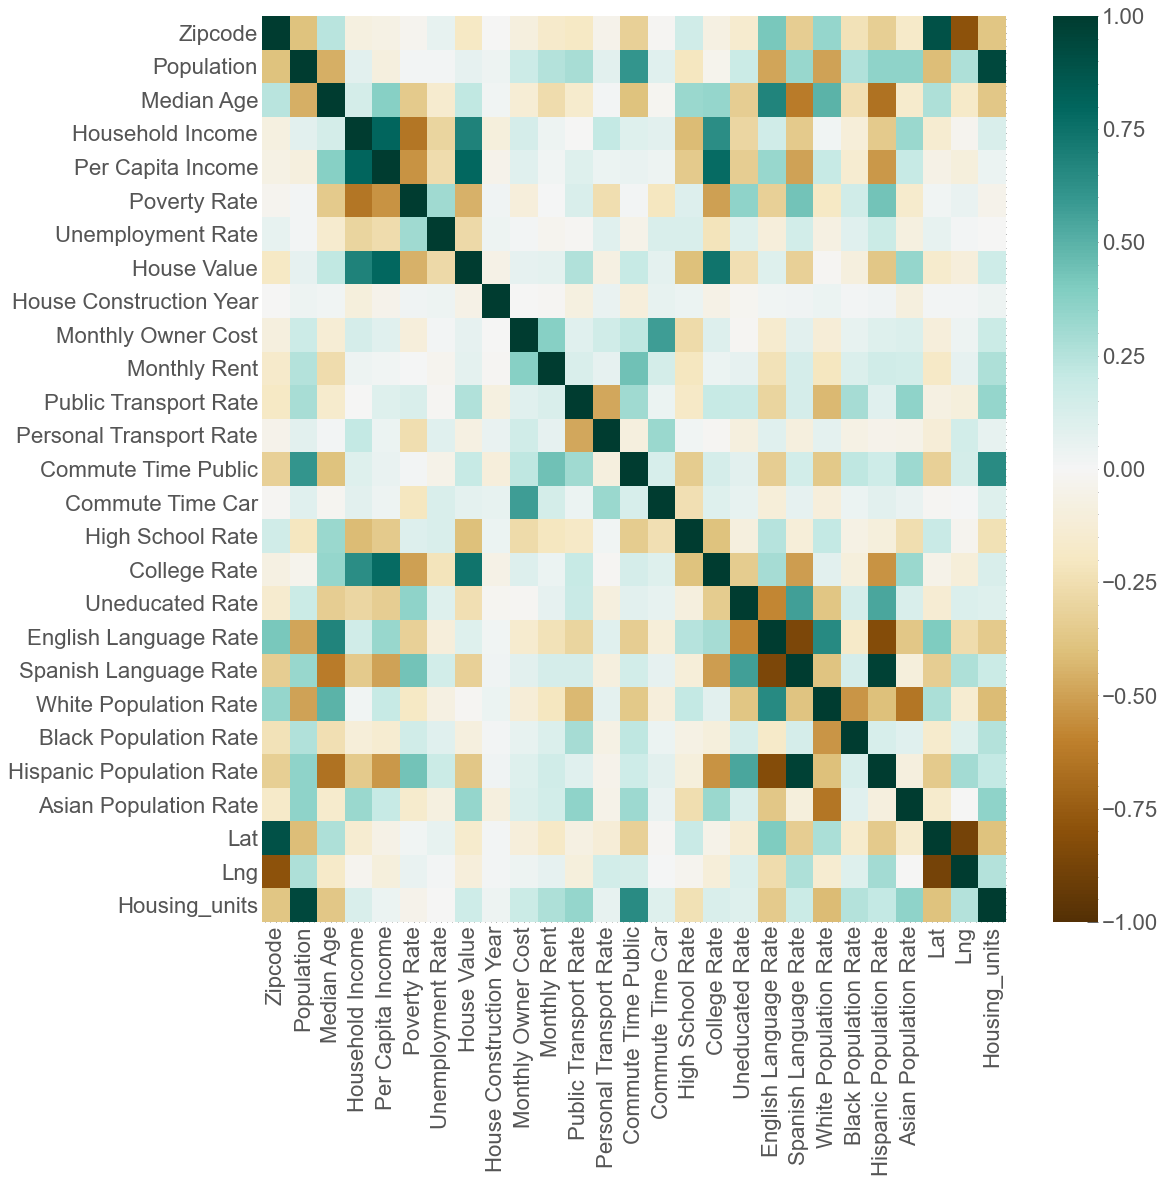

In [122]:
#plotting all correlation using seaborn heatmap
corr_2012=ca_2012.corr()
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_2012,vmin=-1, vmax=1, ax=ax, cmap='BrBG')#annot=True,
plt.show()

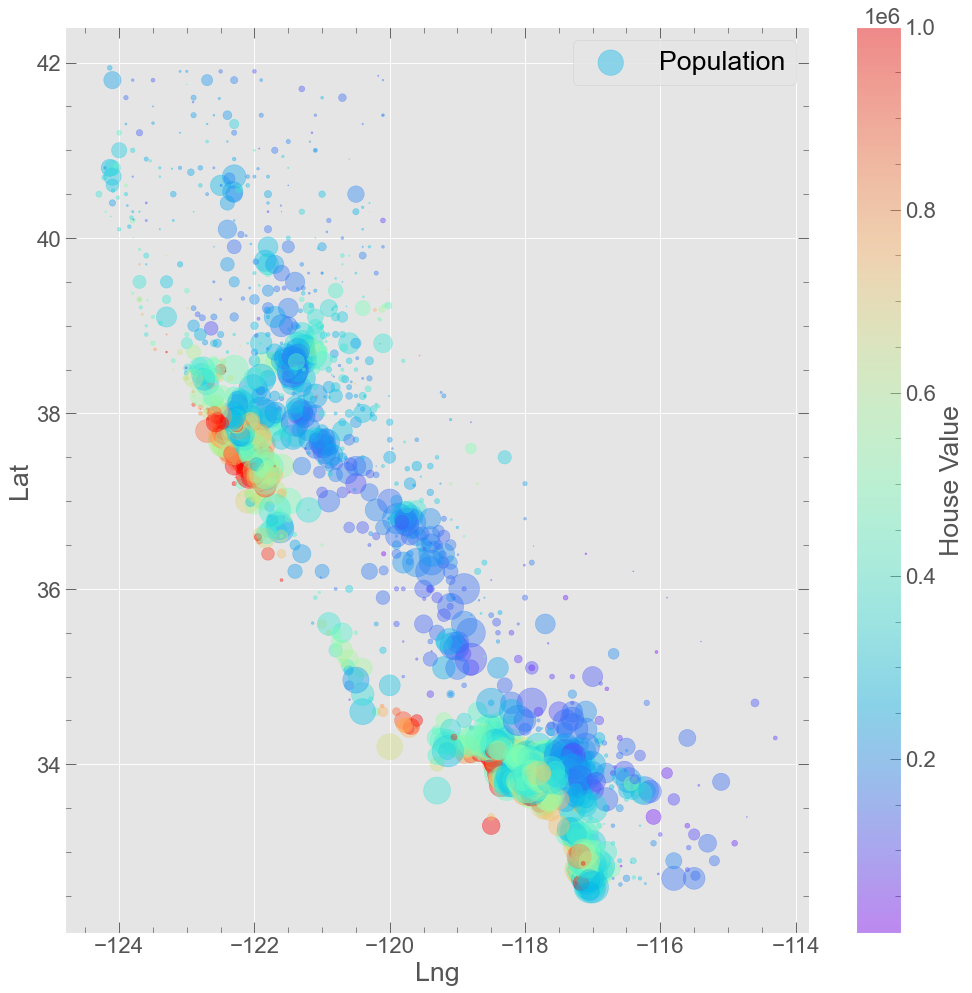

In [110]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.4, 
                s=ca_2012['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('rainbow'),
                colorbar=True, ax=ax)

plt.show()

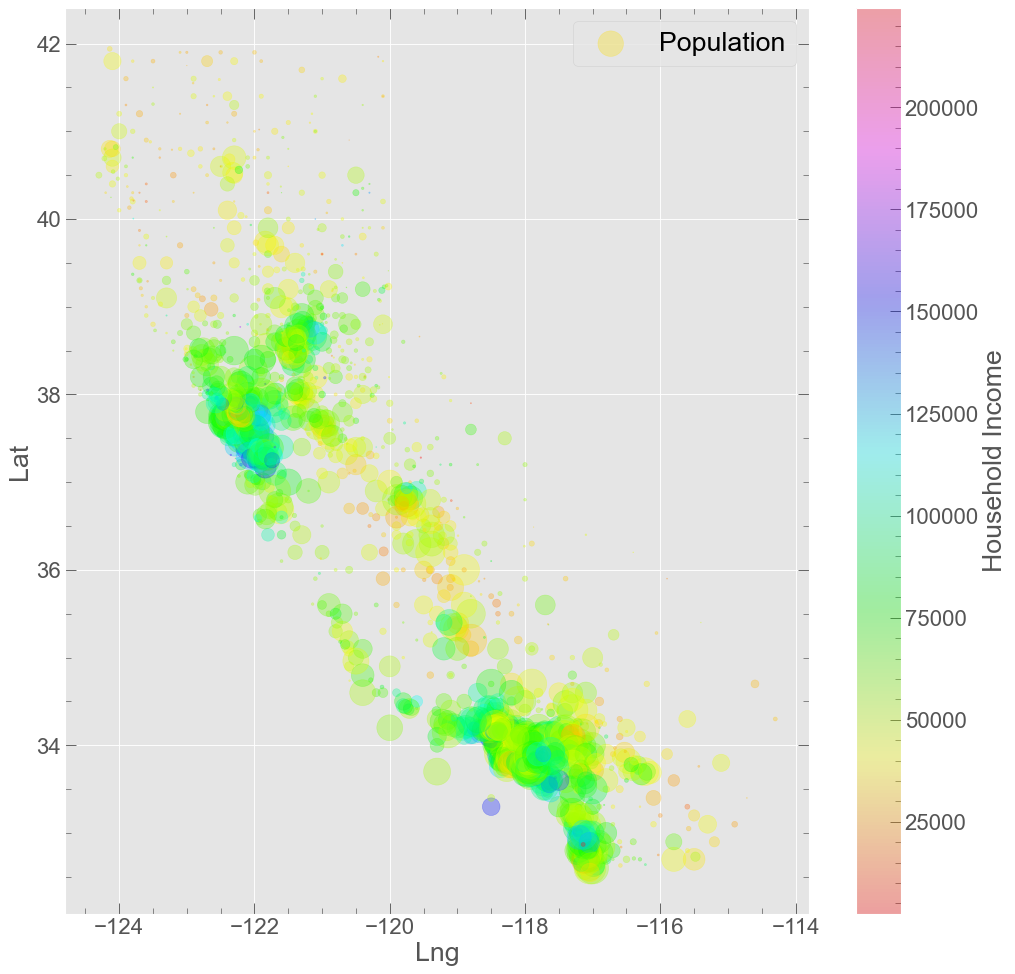

In [119]:
#plotting scatter plot of lat and lng
fig, ax=plt.subplots(figsize=(15,15))
ca_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.3, 
                s=ca_2012['Population']/100,label='Population',
                 c='Household Income', cmap=plt.get_cmap('hsv'),
                colorbar=True, ax=ax)

plt.show()

## Looking for 2014 US census data

In [25]:
# 2014 census data for all US zipcodes
#reading 2014 combined census data
path_comb_2014=os.path.join('output_census', 'census_comb_2014.csv')
usa_2014=pd.read_csv(path_comb_2014)

In [26]:
#looking for usa_2014 dataframe
usa_2014.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,601,18088.0,37.1,10833.0,7229.0,60.321760,11.012826,105400.0,1982.0,722.0,...,96.240602,0.967492,99.806502,0.000000,Adjuntas,Adjuntas Municipio,NaN,NaN,NaN,PR
1,602,40859.0,39.0,16353.0,9048.0,53.168213,10.639027,91200.0,1980.0,843.0,...,58.540346,2.684843,93.203456,0.183558,Aguada,Aguada Municipio,18.36,-67.18,18073.0,PR
2,603,53162.0,39.2,16323.0,9888.0,48.957902,7.623867,128700.0,1977.0,841.0,...,73.001392,3.598435,96.275535,1.183176,Aguadilla,Aguadilla Municipio,18.45,-67.11,25653.0,PR
3,606,6415.0,39.2,14138.0,6385.0,58.893219,2.681216,105800.0,1977.0,569.0,...,87.622759,2.400624,99.890881,0.000000,Maricao,Maricao Municipio,18.20,-66.90,2877.0,PR
4,610,28805.0,39.7,17265.0,8197.0,49.119944,4.481861,113700.0,1979.0,752.0,...,67.127235,3.478563,99.121680,0.090262,Anasco,Aasco Municipio,18.28,-67.13,12618.0,PR


In [27]:
#columns of 2014  dataframe
usa_2014.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [28]:
#shape of the dataframe
usa_2014.shape

(33120, 30)

In [29]:
#removing the rows with house value less than 1
usa_2014=usa_2014[usa_2014['House Value']>0]

In [30]:
#looking for null value
usa_2014.isna().sum()

Zipcode                         0
Population                      0
Median Age                      0
Household Income                0
Per Capita Income               0
Poverty Rate                    0
Unemployment Rate               0
House Value                     0
House Construction Year         0
Monthly Owner Cost              0
Monthly Rent                    0
Public Transport Rate          24
Personal Transport Rate        24
Commute Time Public         22360
Commute Time Car            22360
High School Rate                0
College Rate                    0
Uneducated Rate                 0
English Language Rate           0
Spanish Language Rate           0
White Population Rate           0
Black Population Rate           0
Hispanic Population Rate        0
Asian Population Rate           0
City                            0
County                          1
Lat                            16
Lng                            16
Housing_units                  16
State         

In [31]:
#removing the rows with lat and lng missing value
usa_2014.dropna(subset=['Lat', 'Lng', 
                        'Public Transport Rate',
                        'Personal Transport Rate',
                        'Housing_units','County'], inplace=True)

In [32]:
#shape of the clean dataframe
usa_2014.shape

(31566, 30)

In [33]:
#info of the dataframe
usa_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31566 entries, 1 to 33119
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   31566 non-null  int64  
 1   Population                31566 non-null  float64
 2   Median Age                31566 non-null  float64
 3   Household Income          31566 non-null  float64
 4   Per Capita Income         31566 non-null  float64
 5   Poverty Rate              31566 non-null  float64
 6   Unemployment Rate         31566 non-null  float64
 7   House Value               31566 non-null  float64
 8   House Construction Year   31566 non-null  float64
 9   Monthly Owner Cost        31566 non-null  float64
 10  Monthly Rent              31566 non-null  float64
 11  Public Transport Rate     31566 non-null  float64
 12  Personal Transport Rate   31566 non-null  float64
 13  Commute Time Public       9216 non-null   float64
 14  Commut

In [34]:
#describing the dataframe
usa_2014.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language Rate,Spanish Language Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,3.156600e+04,3.156600e+04,3.156600e+04,...,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000,31566.000000
mean,49609.171070,10013.533992,41.855864,52684.313945,26704.099316,14.920173,4.135390,1.695088e+05,-3.781854e+05,-2.717984e+07,...,0.702388,83.893453,6.295053,84.119520,7.545675,8.928139,1.989687,38.875682,-90.945855,4210.245993
std,27404.337049,14263.612509,8.000296,22457.983560,11870.668552,10.598700,2.886810,1.401093e+05,1.591547e+07,1.318430e+08,...,1.054832,16.003546,12.723919,20.503025,15.739918,16.274622,5.164909,5.321794,15.005610,5647.773350
min,602.000000,7.000000,7.400000,2499.000000,409.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.960000,-173.000000,6.000000
25%,27046.250000,851.250000,36.700000,38600.750000,19957.000000,7.472265,2.425876,8.560000e+04,1.961000e+03,9.500000e+02,...,0.000000,81.509215,0.374322,78.784449,0.000000,0.611800,0.000000,35.465500,-97.100000,438.000000
50%,49814.500000,3133.500000,41.400000,48378.500000,24301.500000,12.715508,3.790434,1.250000e+05,1.974000e+03,1.164000e+03,...,0.423653,89.391662,1.682917,92.710875,0.941675,2.798363,0.288400,39.570000,-88.210000,1483.000000
75%,71832.750000,14048.000000,46.300000,61265.000000,30251.000000,19.872589,5.346762,1.980000e+05,1.983000e+03,1.525000e+03,...,0.940652,92.887727,5.592791,97.634795,6.279383,8.693835,1.610610,42.170000,-80.290000,6049.000000
max,99929.000000,115013.000000,87.300000,250001.000000,392835.000000,100.000000,52.678571,1.000001e+06,2.011000e+03,4.001000e+03,...,33.108108,100.000000,100.000000,100.000000,100.000000,100.000000,76.744186,71.000000,0.000000,47617.000000


## Looking for 2014 California census data

In [35]:
#reading 2014 combined california census data
path_ca_2014=os.path.join('output_census', 'census_ca_2014.csv')
ca_2014=pd.read_csv(path_ca_2014)

In [36]:
#looking for ca_2014 dataframe
ca_2014.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,56314.0,27.3,34050.0,11224.0,33.551160,5.645133,241800.0,1951.0,1649.0,...,49.893455,9.464787,89.814256,0.147388,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,50098.0,26.2,30214.0,10497.0,36.159128,5.561100,218800.0,1951.0,1633.0,...,48.375185,24.583816,74.184598,0.301409,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,66913.0,26.8,30016.0,9915.0,38.381182,6.874598,228600.0,1949.0,1683.0,...,22.385785,24.637963,74.111159,0.361664,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,63547.0,35.8,38493.0,26575.0,25.135726,7.929564,724900.0,1949.0,3578.0,...,34.542937,3.573733,50.831668,25.648732,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,38638.0,34.0,31214.0,19305.0,28.316683,7.000880,635500.0,1953.0,3252.0,...,19.550701,4.280760,52.792588,33.324706,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [37]:
#columns of 2014  dataframe
ca_2014.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [38]:
#shape of the dataframe
ca_2014.shape

(1763, 30)

In [39]:
#removing the rows with house value less than 1
ca_2014=ca_2014[ca_2014['House Value']>0]

In [40]:
#looking for null value
ca_2014.isna().sum()

Zipcode                        0
Population                     0
Median Age                     0
Household Income               0
Per Capita Income              0
Poverty Rate                   0
Unemployment Rate              0
House Value                    0
House Construction Year        0
Monthly Owner Cost             0
Monthly Rent                   0
Public Transport Rate          4
Personal Transport Rate        4
Commute Time Public         1034
Commute Time Car            1034
High School Rate               0
College Rate                   0
Uneducated Rate                0
English Language Rate          0
Spanish Language Rate          0
White Population Rate          0
Black Population Rate          0
Hispanic Population Rate       0
Asian Population Rate          0
City                           0
County                         0
Lat                            0
Lng                            0
Housing_units                  0
State                          0
dtype: int

In [41]:
#shape of the clean dataframe
ca_2014.shape

(1650, 30)

In [42]:
#info of the dataframe
ca_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1762
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1650 non-null   int64  
 1   Population                1650 non-null   float64
 2   Median Age                1650 non-null   float64
 3   Household Income          1650 non-null   float64
 4   Per Capita Income         1650 non-null   float64
 5   Poverty Rate              1650 non-null   float64
 6   Unemployment Rate         1650 non-null   float64
 7   House Value               1650 non-null   float64
 8   House Construction Year   1650 non-null   float64
 9   Monthly Owner Cost        1650 non-null   float64
 10  Monthly Rent              1650 non-null   float64
 11  Public Transport Rate     1646 non-null   float64
 12  Personal Transport Rate   1646 non-null   float64
 13  Commute Time Public       616 non-null    float64
 14  Commute 

In [43]:
#describing the dataframe
ca_2014.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language Rate,Spanish Language Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1.650000e+03,1.650000e+03,1.650000e+03,...,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,93647.571515,23020.440000,40.160000,62685.026061,31366.643030,16.116809,5.357382,3.867070e+05,-1.210152e+06,-2.383631e+07,...,1.284122,62.947265,20.750490,71.290123,4.186615,29.880461,9.283359,36.400557,-119.926753,8279.560606
std,1811.159185,21883.767618,9.181757,28552.044319,17289.951698,10.960479,2.786438,2.430556e+05,2.840960e+07,1.238280e+08,...,1.636936,22.861961,19.900152,19.579584,7.258095,24.337516,12.565222,2.429172,2.123745,7248.557285
min,90001.000000,19.000000,18.900000,6827.000000,4350.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,2.068966,0.000000,9.683246,0.000000,0.000000,0.000000,32.550000,-124.300000,21.000000
25%,92254.500000,2335.000000,33.400000,42300.000000,20107.250000,8.204265,3.810151,2.031250e+05,1.964000e+03,1.500250e+03,...,0.216610,46.647206,5.855933,58.968209,0.420049,10.400814,0.969043,34.060000,-121.890000,1266.250000
50%,93650.500000,19063.000000,38.700000,56821.000000,27315.000000,13.725463,5.160883,3.283500e+05,1.974000e+03,1.994000e+03,...,0.843697,66.348196,13.764584,75.306066,1.797825,22.372074,4.459429,36.700000,-120.090000,7089.000000
75%,95367.750000,37374.000000,45.500000,77347.000000,38159.500000,21.138321,6.674800,5.159500e+05,1.981000e+03,2.581750e+03,...,1.857586,81.595297,30.765264,86.720081,4.816977,43.750314,11.730014,38.203750,-118.072500,13621.750000
max,96161.000000,106521.000000,74.500000,236912.000000,142620.000000,84.444444,30.000000,1.000001e+06,2.011000e+03,4.001000e+03,...,33.108108,100.000000,89.793103,100.000000,81.710857,100.000000,73.655063,41.940000,-114.300000,37182.000000


## Looking for 2015 US census data

In [44]:
# 2015 census data for all US zipcodes
#reading 2015 combined census data
path_comb_2015=os.path.join('output_census', 'census_comb_2015.csv')
usa_2015=pd.read_csv(path_comb_2015)

In [45]:
#looking for usa_2015 dataframe
usa_2015.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,12810,724.0,46.5,57500.0,25551.0,10.773481,2.762431,116200.0,1975.0,1054.0,...,99.033149,0.000000,1.933702,0.276243,Athol,Warren County,43.480,-73.880,363.0,NY
1,12811,67.0,45.9,-666666666.0,11590.0,0.000000,29.850746,-666666666.0,1976.0,-666666666.0,...,100.000000,0.000000,0.000000,0.000000,Bakers Mills,Warren County,43.622,-74.035,65.0,NY
2,12812,58.0,64.1,49583.0,23600.0,0.000000,0.000000,122500.0,1950.0,NaN,...,100.000000,0.000000,0.000000,0.000000,Blue Mountain Lake,Hamilton County,43.900,-74.300,324.0,NY
3,12814,1282.0,46.4,58176.0,35508.0,3.978159,0.936037,317100.0,1977.0,1670.0,...,89.859594,2.808112,2.496100,1.092044,Bolton Landing,Warren County,43.600,-73.600,1822.0,NY
4,12815,1103.0,54.2,60458.0,30685.0,14.415231,2.629193,227300.0,1976.0,1149.0,...,91.296464,1.359927,0.543971,0.000000,Brant Lake,Warren County,43.690,-73.710,1112.0,NY


In [46]:
#columns of 2015  dataframe
usa_2015.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [47]:
#shape of the dataframe
usa_2015.shape

(33120, 30)

In [48]:
#removing the rows with house value less than 1
usa_2015=usa_2015[usa_2015['House Value']>0]

In [49]:
#looking for null value
usa_2015.isna().sum()

Zipcode                         0
Population                      0
Median Age                      0
Household Income              616
Per Capita Income               1
Poverty Rate                    0
Unemployment Rate               0
House Value                     0
House Construction Year         0
Monthly Owner Cost            935
Monthly Rent                  426
Public Transport Rate          22
Personal Transport Rate        22
Commute Time Public         21640
Commute Time Car            21640
High School Rate                0
College Rate                    0
Uneducated Rate                 0
English Language Rate           0
Spanish Language Rate           0
White Population Rate           0
Black Population Rate           0
Hispanic Population Rate        0
Asian Population Rate           0
City                            0
County                          1
Lat                            16
Lng                            16
Housing_units                  16
State         

In [50]:
#removing the rows with lat and lng missing value
usa_2015.dropna(subset=['Lat', 'Lng', 'Per Capita Income','County',
                        'Monthly Owner Cost','Monthly Rent',
                        'Public Transport Rate','Household Income',
                        'Personal Transport Rate'], 
                         inplace=True)

In [51]:
#shape of the clean dataframe
usa_2015.shape

(28999, 30)

In [52]:
#info of the dataframe
usa_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28999 entries, 0 to 32155
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   28999 non-null  int64  
 1   Population                28999 non-null  float64
 2   Median Age                28999 non-null  float64
 3   Household Income          28999 non-null  float64
 4   Per Capita Income         28999 non-null  float64
 5   Poverty Rate              28999 non-null  float64
 6   Unemployment Rate         28999 non-null  float64
 7   House Value               28999 non-null  float64
 8   House Construction Year   28999 non-null  float64
 9   Monthly Owner Cost        28999 non-null  float64
 10  Monthly Rent              28999 non-null  float64
 11  Public Transport Rate     28999 non-null  float64
 12  Personal Transport Rate   28999 non-null  float64
 13  Commute Time Public       8660 non-null   float64
 14  Commut

In [53]:
#describing the dataframe
usa_2015.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language Rate,Spanish Language Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,2.899900e+04,2.899900e+04,2.899900e+04,...,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000,28999.000000
mean,49251.958999,10927.334839,41.716256,53747.755716,27219.152488,14.584862,3.752067,1.757936e+05,-3.198790e+05,-1.064272e+07,...,0.713101,83.522174,6.510056,83.656883,7.779109,9.300818,2.165555,38.864012,-90.695827,4555.046933
std,27340.927429,14734.375868,7.523157,22277.173705,11948.057303,9.730336,2.389331,1.536110e+05,1.464486e+07,8.356437e+07,...,0.958193,16.047824,12.816510,20.384225,15.728112,16.350445,5.399294,5.308765,14.873766,5761.654907
min,602.000000,15.000000,13.300000,2499.000000,3049.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.960000,-171.690000,6.000000
25%,27103.500000,1137.000000,36.800000,39722.500000,20427.000000,7.593165,2.273484,8.850000e+04,1.962000e+03,9.660000e+02,...,0.103999,81.150419,0.515716,77.934342,0.000000,0.918900,0.000000,35.400000,-96.800000,578.000000
50%,49630.000000,3890.000000,41.400000,49375.000000,24764.000000,12.617178,3.441250,1.301000e+05,1.975000e+03,1.165000e+03,...,0.470665,89.253731,1.859666,92.131373,1.147396,3.180624,0.398095,39.660000,-88.100000,1804.000000
75%,71111.500000,15898.500000,46.000000,62121.500000,30749.000000,19.396525,4.810971,2.021500e+05,1.983000e+03,1.515000e+03,...,0.966073,92.694936,5.845854,97.230643,6.854782,9.176250,1.821858,42.200000,-80.190000,6770.000000
max,99929.000000,114982.000000,86.300000,250001.000000,465868.000000,90.319032,40.552995,2.000001e+06,2.010000e+03,4.001000e+03,...,44.700461,100.000000,100.000000,100.000000,100.000000,100.000000,86.635945,71.000000,0.000000,47617.000000


## Looking for 2015 California census data

In [54]:
#reading 2015 combined california census data
path_ca_2015=os.path.join('output_census', 'census_ca_2015.csv')
ca_2015=pd.read_csv(path_ca_2015)

In [55]:
#looking for ca_2015 dataframe
ca_2015.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,95422,15476.0,42.3,25578.0,16355.0,36.792453,8.419488,86800.0,1976.0,1123.0,...,72.221504,6.216077,23.901525,0.394159,Clearlake,Lake County,38.97,-122.64,8546.0,CA
1,95423,3260.0,55.8,27889.0,18760.0,33.067485,7.239264,160100.0,1975.0,1307.0,...,89.969325,1.717791,6.349693,0.490798,Clearlake Oaks,Lake County,39.10,-122.60,2680.0,CA
2,95425,10597.0,42.3,60517.0,29688.0,8.106068,3.189582,353400.0,1982.0,2026.0,...,77.691800,0.990846,31.112579,4.916486,Cloverdale,Sonoma County,38.80,-123.00,4544.0,CA
3,95426,1544.0,50.9,62833.0,27425.0,24.740933,4.274611,195100.0,1979.0,1295.0,...,91.904145,0.000000,7.707254,6.282383,Cobb,Lake County,38.81,-122.73,1315.0,CA
4,95428,2365.0,40.1,30975.0,16874.0,31.585624,7.906977,235800.0,1973.0,1250.0,...,57.589852,0.507400,16.490486,0.126850,Covelo,Mendocino County,39.70,-123.10,1160.0,CA


In [56]:
#columns of 2015  dataframe
ca_2015.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language Rate',
       'Spanish Language Rate', 'White Population Rate',
       'Black Population Rate', 'Hispanic Population Rate',
       'Asian Population Rate', 'City', 'County', 'Lat', 'Lng',
       'Housing_units', 'State'],
      dtype='object')

In [57]:
#shape of the dataframe
ca_2015.shape

(1763, 30)

In [58]:
#removing the rows with house value less than 1
ca_2015=ca_2015[ca_2015['House Value']>0]

In [59]:
#looking for null value
ca_2015.isna().sum()

Zipcode                       0
Population                    0
Median Age                    0
Household Income             27
Per Capita Income             0
Poverty Rate                  0
Unemployment Rate             0
House Value                   0
House Construction Year       0
Monthly Owner Cost           66
Monthly Rent                 24
Public Transport Rate         2
Personal Transport Rate       2
Commute Time Public         978
Commute Time Car            978
High School Rate              0
College Rate                  0
Uneducated Rate               0
English Language Rate         0
Spanish Language Rate         0
White Population Rate         0
Black Population Rate         0
Hispanic Population Rate      0
Asian Population Rate         0
City                          0
County                        0
Lat                           0
Lng                           0
Housing_units                 0
State                         0
dtype: int64

In [60]:
#removing the rows with lat and lng missing value
ca_2015.dropna(subset=['Household Income', 'Monthly Rent', 
                        'Monthly Owner Cost','Personal Transport Rate',
                      'Public Transport Rate'],inplace=True)

In [61]:
#shape of the clean dataframe
ca_2015.shape

(1510, 30)

In [62]:
#info of the dataframe
ca_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 1716
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1510 non-null   int64  
 1   Population                1510 non-null   float64
 2   Median Age                1510 non-null   float64
 3   Household Income          1510 non-null   float64
 4   Per Capita Income         1510 non-null   float64
 5   Poverty Rate              1510 non-null   float64
 6   Unemployment Rate         1510 non-null   float64
 7   House Value               1510 non-null   float64
 8   House Construction Year   1510 non-null   float64
 9   Monthly Owner Cost        1510 non-null   float64
 10  Monthly Rent              1510 non-null   float64
 11  Public Transport Rate     1510 non-null   float64
 12  Personal Transport Rate   1510 non-null   float64
 13  Commute Time Public       606 non-null    float64
 14  Commute 

In [63]:
#describing the dataframe
ca_2015.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language Rate,Spanish Language Rate,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03,1.510000e+03,1.510000e+03,...,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.00000
mean,93551.304636,25311.337086,39.689868,64556.146358,32139.794040,15.883107,4.890217,4.252555e+05,-8.810314e+05,-5.737410e+06,...,1.400928,61.331320,21.503369,69.795753,4.357441,31.130076,10.138826,36.253752,-119.849281,9002.01457
std,1821.659431,21950.173853,8.490938,29106.845713,17705.361214,9.962319,2.461903,3.049659e+05,2.425452e+07,6.161119e+07,...,1.761647,22.423834,19.863408,19.617808,7.253544,24.282121,13.062935,2.395936,2.100785,7145.82226
min,90001.000000,47.000000,19.400000,12487.000000,5529.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,1.603206,0.000000,10.533035,0.000000,0.000000,0.000000,32.550000,-124.300000,76.00000
25%,92129.250000,4296.500000,33.500000,42919.250000,20415.500000,8.247666,3.532566,2.153250e+05,1.965000e+03,1.517750e+03,...,0.367209,45.720728,6.363251,57.365942,0.595743,11.893851,1.430596,34.030000,-121.810000,2077.25000
50%,93607.000000,22528.500000,38.800000,58095.500000,27757.000000,13.750028,4.653866,3.495000e+05,1.975000e+03,2.006500e+03,...,0.990781,64.455476,14.332020,74.030657,1.960011,23.881370,5.239837,36.500000,-119.810000,8381.00000
75%,95323.750000,39426.500000,44.700000,79337.000000,39409.500000,21.510892,5.992740,5.603750e+05,1.982000e+03,2.574750e+03,...,2.006588,79.705945,31.863368,85.081757,5.041349,45.664474,12.841427,38.095000,-118.042500,14274.50000
max,96161.000000,106659.000000,74.900000,236500.000000,153109.000000,59.071730,31.914894,2.000001e+06,2.005000e+03,4.001000e+03,...,44.700461,100.000000,90.681363,100.000000,80.319183,100.000000,86.635945,41.940000,-114.300000,37182.00000


## Looking for 2017 US census data

In [64]:
# 2017 census data for all US zipcodes
#reading 2017 combined census data
path_comb_2017=os.path.join('output_census', 'census_comb_2017.csv')
usa_2017=pd.read_csv(path_comb_2017)

In [65]:
#looking for usa_2017 dataframe
usa_2017.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,601,17599.0,38.9,11757.0,7041.0,64.105915,13.943974,82500.0,1981.0,748.0,...,77.765782,0.681857,99.624979,0.000,Adjuntas,Adjuntas Municipio,NaN,NaN,NaN,PR
1,602,39209.0,40.9,16190.0,8978.0,52.100283,6.473004,87300.0,1979.0,846.0,...,66.854549,2.785075,93.692775,0.000,Aguada,Aguada Municipio,18.36,-67.18,18073.0,PR
2,603,50135.0,40.4,16645.0,10897.0,50.216416,7.156677,122300.0,1977.0,867.0,...,71.225691,3.959310,97.466840,1.111,Aguadilla,Aguadilla Municipio,18.45,-67.11,25653.0,PR
3,606,6304.0,42.8,13387.0,5960.0,64.911168,3.236041,92700.0,1979.0,538.0,...,48.302665,2.538071,99.809645,0.000,Maricao,Maricao Municipio,18.20,-66.90,2877.0,PR
4,610,27590.0,41.4,18741.0,9266.0,45.498369,5.342515,90300.0,1979.0,733.0,...,61.754259,3.062704,97.317869,0.000,Anasco,Aasco Municipio,18.28,-67.13,12618.0,PR


In [66]:
#columns of 20147  dataframe
usa_2017.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [67]:
#shape of the dataframe
usa_2017.shape

(33120, 30)

In [68]:
#removing the rows with house value less than 1
usa_2017=usa_2017[usa_2017['House Value']>0]

In [69]:
#looking for null value
usa_2017.isna().sum()

Zipcode                         0
Population                      0
Median Age                      0
Household Income                0
Per Capita Income               0
Poverty Rate                    0
Unemployment Rate               0
House Value                     0
House Construction Year         0
Monthly Owner Cost              0
Monthly Rent                    0
Public Transport Rate          10
Personal Transport Rate        10
Commute Time Public         21587
Commute Time Car            21587
High School Rate                0
College Rate                    0
Uneducated Rate                 0
English Language            30578
Spanish Language            30578
White Population Rate           0
Black Population Rate           0
Hispanic Population Rate        0
Asian Population Rate           0
City                            0
County                          1
Lat                            16
Lng                            16
Housing_units                  16
State         

In [70]:
#removing the rows with lat and lng missing value
usa_2017.dropna(subset=['Lat', 'Lng', 'Housing_units','County',
                        'Public Transport Rate','Personal Transport Rate'], 
                         inplace=True)

In [71]:
#shape of the clean dataframe
usa_2017.shape

(30551, 30)

In [72]:
#info of the dataframe
usa_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30551 entries, 1 to 33119
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   30551 non-null  int64  
 1   Population                30551 non-null  float64
 2   Median Age                30551 non-null  float64
 3   Household Income          30551 non-null  float64
 4   Per Capita Income         30551 non-null  float64
 5   Poverty Rate              30551 non-null  float64
 6   Unemployment Rate         30551 non-null  float64
 7   House Value               30551 non-null  float64
 8   House Construction Year   30551 non-null  float64
 9   Monthly Owner Cost        30551 non-null  float64
 10  Monthly Rent              30551 non-null  float64
 11  Public Transport Rate     30551 non-null  float64
 12  Personal Transport Rate   30551 non-null  float64
 13  Commute Time Public       8975 non-null   float64
 14  Commut

In [73]:
#describing the dataframe
usa_2017.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language,Spanish Language,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,30551.000000,30551.000000,30551.000000,3.055100e+04,30551.000000,30551.000000,30551.000000,3.055100e+04,3.055100e+04,3.055100e+04,...,30551.000000,0.0,0.0,30551.000000,30551.000000,30551.000000,30551.000000,30551.000000,30551.00000,30551.000000
mean,49389.320710,10554.013420,42.399146,-1.329884e+07,29083.046643,14.098369,3.007061,1.864354e+05,-3.689928e+05,-2.448234e+07,...,0.720479,NaN,NaN,83.587036,7.637893,9.447783,2.181133,38.875873,-90.82195,4343.344244
std,27434.535206,14824.584547,8.090451,9.341614e+07,12803.982673,9.881468,2.286498,1.696125e+05,1.572201e+07,1.253936e+08,...,1.079016,NaN,NaN,20.572324,15.621534,16.525098,5.481052,5.312163,14.99071,5692.323312
min,602.000000,10.000000,6.200000,-6.666667e+08,3309.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,17.960000,-173.00000,0.000000
25%,26751.500000,951.000000,37.100000,4.108600e+04,21662.000000,7.093299,1.682691,9.150000e+04,1.963000e+03,9.650000e+02,...,0.000000,NaN,NaN,77.721363,0.000000,0.865376,0.000000,35.450000,-96.97500,496.000000
50%,49655.000000,3395.000000,41.900000,5.168800e+04,26428.000000,11.955274,2.685051,1.375000e+05,1.975000e+03,1.170000e+03,...,0.448649,NaN,NaN,92.180356,1.065644,3.230108,0.375051,39.600000,-88.10000,1614.000000
75%,71455.500000,15011.000000,46.900000,6.568200e+04,32915.000000,18.755430,3.846204,2.150500e+05,1.984000e+03,1.521000e+03,...,0.956690,NaN,NaN,97.255024,6.609074,9.405645,1.815993,42.180000,-80.20000,6320.000000
max,99929.000000,119204.000000,89.000000,2.500010e+05,298129.000000,97.368421,44.800000,2.000001e+06,2.012000e+03,4.001000e+03,...,49.253731,NaN,NaN,100.000000,100.000000,100.000000,91.044776,71.000000,0.00000,47617.000000


## Looking for 2017 California census data

In [74]:
#reading 2017 combined california census data
path_ca_2017=os.path.join('output_census', 'census_ca_2017.csv')
ca_2017=pd.read_csv(path_ca_2017)

In [75]:
#looking for usa_2017 dataframe
ca_2017.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,58738.0,28.7,35660.0,11882.0,31.757976,4.974633,305500.0,1949.0,1695.0,...,32.367462,9.164425,89.841329,0.224727,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,52856.0,27.7,34000.0,11807.0,33.666944,5.032541,272400.0,1951.0,1678.0,...,37.683517,21.569926,76.420842,0.565688,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,70490.0,28.2,34397.0,11305.0,32.929494,5.440488,300700.0,1951.0,1688.0,...,29.767343,22.383317,76.766917,0.285147,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,62733.0,35.1,46581.0,30590.0,19.104777,4.182806,918500.0,1943.0,3467.0,...,37.758437,4.055282,51.350964,25.074522,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39562.0,35.4,32461.0,21566.0,28.562762,5.156463,713400.0,1949.0,3067.0,...,20.335170,6.228199,49.519741,34.823821,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [76]:
#columns of 2017  dataframe
ca_2017.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [77]:
#shape of the dataframe
ca_2017.shape

(1763, 30)

In [78]:
#removing the rows with house value less than 1
ca_2017=ca_2017[ca_2017['House Value']>0]

In [79]:
#looking for null value
ca_2017.isna().sum()

Zipcode                        0
Population                     0
Median Age                     0
Household Income               0
Per Capita Income              0
Poverty Rate                   0
Unemployment Rate              0
House Value                    0
House Construction Year        0
Monthly Owner Cost             0
Monthly Rent                   0
Public Transport Rate          0
Personal Transport Rate        0
Commute Time Public          950
Commute Time Car             950
High School Rate               0
College Rate                   0
Uneducated Rate                0
English Language            1603
Spanish Language            1603
White Population Rate          0
Black Population Rate          0
Hispanic Population Rate       0
Asian Population Rate          0
City                           0
County                         0
Lat                            0
Lng                            0
Housing_units                  0
State                          0
dtype: int

In [ ]:
#removing the rows with lat and lng missing value


In [80]:
#shape of the clean dataframe
ca_2017.shape

(1603, 30)

In [81]:
#info of the dataframe
ca_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 1762
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1603 non-null   int64  
 1   Population                1603 non-null   float64
 2   Median Age                1603 non-null   float64
 3   Household Income          1603 non-null   float64
 4   Per Capita Income         1603 non-null   float64
 5   Poverty Rate              1603 non-null   float64
 6   Unemployment Rate         1603 non-null   float64
 7   House Value               1603 non-null   float64
 8   House Construction Year   1603 non-null   float64
 9   Monthly Owner Cost        1603 non-null   float64
 10  Monthly Rent              1603 non-null   float64
 11  Public Transport Rate     1603 non-null   float64
 12  Personal Transport Rate   1603 non-null   float64
 13  Commute Time Public       653 non-null    float64
 14  Commute 

In [82]:
#describing the dataframe
ca_2017.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language,Spanish Language,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,1603.000000,1603.000000,1603.000000,1.603000e+03,1603.000000,1603.000000,1603.000000,1.603000e+03,1.603000e+03,1.603000e+03,...,1603.000000,0.0,0.0,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000
mean,93615.858391,24255.411104,40.699439,-1.157661e+07,34704.905178,15.069615,3.758846,4.804898e+05,-8.298025e+05,-2.245580e+07,...,1.380712,NaN,NaN,69.891782,4.140529,30.870654,9.906122,36.347634,-119.908611,8513.565814
std,1815.079634,22409.729750,9.258523,8.737260e+07,19231.863089,9.774355,2.091052,3.449437e+05,2.354088e+07,1.203191e+08,...,1.865957,NaN,NaN,20.034087,6.839564,24.580061,13.176867,2.417502,2.122225,7221.991293
min,90001.000000,21.000000,16.500000,-6.666667e+08,4804.000000,0.000000,0.000000,3.900000e+04,-6.666667e+08,-6.666667e+08,...,0.000000,NaN,NaN,8.955224,0.000000,0.000000,0.000000,32.550000,-124.300000,21.000000
25%,92235.000000,3117.500000,34.100000,4.493250e+04,22010.000000,7.782075,2.589084,2.413000e+05,1.965000e+03,1.495500e+03,...,0.304018,NaN,NaN,56.454612,0.477819,11.320723,1.160332,34.050000,-121.885000,1478.500000
50%,93641.000000,20521.000000,39.000000,6.180100e+04,30130.000000,12.911282,3.486169,3.864000e+05,1.975000e+03,2.003000e+03,...,0.964467,NaN,NaN,74.309912,1.864598,23.381443,4.955789,36.630000,-120.000000,7496.000000
75%,95352.500000,38483.000000,46.050000,8.491650e+04,42448.000000,20.369123,4.757319,6.246000e+05,1.982000e+03,2.610000e+03,...,1.949272,NaN,NaN,86.061824,4.936286,45.864916,12.930861,38.200000,-118.064350,13804.000000
max,96161.000000,108051.000000,75.300000,2.500010e+05,154723.000000,63.384064,20.521542,2.000001e+06,2.009000e+03,4.001000e+03,...,49.253731,NaN,NaN,100.000000,76.807500,98.388541,91.044776,41.940000,-114.300000,37182.000000


## Looking for 2019 US census data

In [83]:
# 2019 census data for all US zipcodes
#reading 2019 combined census data
path_comb_2019=os.path.join('output_census', 'census_comb_2019.csv')
usa_2019=pd.read_csv(path_comb_2019)

In [84]:
#looking for usa_2014 dataframe
usa_2019.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,601,17113.0,41.9,14361.0,7493.0,61.660726,11.500029,83900.0,1981,771.0,...,73.721732,1.063519,99.643546,0.011687,Adjuntas,Adjuntas Municipio,NaN,NaN,NaN,PR
1,602,37751.0,42.9,16807.0,9694.0,49.410612,3.761490,85300.0,1978,877.0,...,85.240126,2.405234,92.469074,0.000000,Aguada,Aguada Municipio,18.36,-67.18,18073.0,PR
2,603,47081.0,42.1,16049.0,11259.0,50.319662,6.790425,118400.0,1980,832.0,...,79.350481,3.215735,97.368365,0.229392,Aguadilla,Aguadilla Municipio,18.45,-67.11,25653.0,PR
3,606,6392.0,44.3,12119.0,6093.0,65.472466,2.643930,80800.0,1978,526.0,...,45.525657,1.439299,99.155194,0.000000,Maricao,Maricao Municipio,18.20,-66.90,2877.0,PR
4,610,26686.0,42.7,19898.0,10572.0,45.731844,3.855954,87600.0,1978,751.0,...,82.597617,1.727498,95.061081,0.000000,Anasco,Aasco Municipio,18.28,-67.13,12618.0,PR


In [85]:
#columns of 2014  dataframe
usa_2019.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [86]:
#shape of the dataframe
usa_2019.shape

(33120, 30)

In [87]:
#removing the rows with house value less than 1
usa_2019=usa_2019[usa_2019['House Value']>0]

In [88]:
#looking for null value
usa_2019.isna().sum()

Zipcode                         0
Population                      0
Median Age                      0
Household Income                0
Per Capita Income               1
Poverty Rate                    0
Unemployment Rate               0
House Value                     0
House Construction Year         0
Monthly Owner Cost              0
Monthly Rent                    0
Public Transport Rate          17
Personal Transport Rate        17
Commute Time Public         21777
Commute Time Car            21777
High School Rate                0
College Rate                    0
Uneducated Rate                 0
English Language            30550
Spanish Language            30550
White Population Rate           0
Black Population Rate           0
Hispanic Population Rate        0
Asian Population Rate           0
City                            0
County                          1
Lat                            16
Lng                            16
Housing_units                  16
State         

In [89]:
#removing the rows with lat and lng missing value
usa_2019.dropna(subset=['Lat', 'Lng','Housing_units','County', 
                        'Public Transport Rate','Personal Transport Rate'], 
                         inplace=True)

In [90]:
#shape of the clean dataframe
usa_2019.shape

(30516, 30)

In [91]:
#info of the dataframe
usa_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30516 entries, 1 to 33119
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   30516 non-null  int64  
 1   Population                30516 non-null  float64
 2   Median Age                30516 non-null  float64
 3   Household Income          30516 non-null  float64
 4   Per Capita Income         30515 non-null  float64
 5   Poverty Rate              30516 non-null  float64
 6   Unemployment Rate         30516 non-null  float64
 7   House Value               30516 non-null  float64
 8   House Construction Year   30516 non-null  int64  
 9   Monthly Owner Cost        30516 non-null  float64
 10  Monthly Rent              30516 non-null  float64
 11  Public Transport Rate     30516 non-null  float64
 12  Personal Transport Rate   30516 non-null  float64
 13  Commute Time Public       8752 non-null   float64
 14  Commut

In [92]:
#describing the dataframe
usa_2019.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language,Spanish Language,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,30516.000000,30516.000000,30516.000000,3.051600e+04,30515.000000,30516.000000,30516.000000,3.051600e+04,3.051600e+04,3.051600e+04,...,30516.000000,0.0,0.0,30516.000000,30516.000000,30516.000000,30516.000000,30516.000000,30516.000000,30516.000000
mean,49423.038537,10683.708186,42.746726,-1.477351e+07,31531.951040,13.278442,2.472127,2.037764e+05,-1.947466e+05,-2.708825e+07,...,0.719490,NaN,NaN,83.250289,7.673935,9.729641,2.259429,38.878655,-90.843709,4348.470606
std,27446.557667,15041.199080,8.249670,9.834241e+07,13911.731632,9.571863,2.097497,1.873348e+05,1.144750e+07,1.316303e+08,...,1.040217,NaN,NaN,20.658997,15.526557,16.666462,5.608817,5.317071,15.004951,5693.704526
min,602.000000,12.000000,13.700000,-6.666667e+08,3054.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,17.960000,-173.000000,0.000000
25%,26879.500000,947.000000,37.300000,4.425000e+04,23431.500000,6.546742,1.275414,9.940000e+04,1.963000e+03,9.990000e+02,...,0.000000,NaN,NaN,77.139495,0.000000,0.931157,0.000000,35.439750,-97.000000,497.000000
50%,49667.500000,3416.000000,42.000000,5.548800e+04,28609.000000,11.200000,2.161417,1.503000e+05,1.976000e+03,1.214000e+03,...,0.438219,NaN,NaN,91.788754,1.139280,3.464893,0.395067,39.600000,-88.100000,1618.000000
75%,71467.250000,15171.500000,47.300000,7.083475e+04,35584.500000,17.623269,3.173821,2.360000e+05,1.984000e+03,1.594000e+03,...,0.962075,NaN,NaN,97.087013,6.763813,9.956003,1.909590,42.190000,-80.200000,6335.500000
max,99929.000000,128294.000000,91.500000,2.500010e+05,224823.000000,85.142857,50.684932,2.000001e+06,2.014000e+03,4.001000e+03,...,26.595745,NaN,NaN,100.000000,100.000000,100.000000,75.288276,71.000000,0.000000,47617.000000


## Looking for 2019 California census data

In [93]:
#reading 2019 combined california census data
path_ca_2019=os.path.join('output_census', 'census_ca_2019.csv')
ca_2019=pd.read_csv(path_ca_2019)

In [94]:
#looking for usa_2019 dataframe
ca_2019.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [95]:
#columns of 2019  dataframe
ca_2019.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [96]:
#shape of the dataframe
ca_2019.shape

(1763, 30)

In [97]:
#removing the rows with house value less than 1
ca_2019=ca_2019[ca_2019['House Value']>0]

In [98]:
#looking for null value
ca_2012.isna().sum()

Zipcode                        0
Population                     0
Median Age                     0
Household Income               0
Per Capita Income              0
Poverty Rate                   0
Unemployment Rate              0
House Value                    0
House Construction Year        0
Monthly Owner Cost             0
Monthly Rent                   0
Public Transport Rate          0
Personal Transport Rate        0
Commute Time Public         1072
Commute Time Car            1072
High School Rate               0
College Rate                   0
Uneducated Rate                0
English Language Rate          0
Spanish Language Rate          0
White Population Rate          0
Black Population Rate          0
Hispanic Population Rate       0
Asian Population Rate          0
City                           0
County                         0
Lat                            0
Lng                            0
Housing_units                  0
State                          0
dtype: int

In [ ]:
#removing the rows with lat and lng missing value


In [99]:
#shape of the clean dataframe
ca_2019.shape

(1608, 30)

In [100]:
#info of the dataframe
ca_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1762
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1608 non-null   int64  
 1   Population                1608 non-null   float64
 2   Median Age                1608 non-null   float64
 3   Household Income          1608 non-null   float64
 4   Per Capita Income         1608 non-null   float64
 5   Poverty Rate              1608 non-null   float64
 6   Unemployment Rate         1608 non-null   float64
 7   House Value               1608 non-null   float64
 8   House Construction Year   1608 non-null   int64  
 9   Monthly Owner Cost        1608 non-null   float64
 10  Monthly Rent              1608 non-null   float64
 11  Public Transport Rate     1607 non-null   float64
 12  Personal Transport Rate   1607 non-null   float64
 13  Commute Time Public       670 non-null    float64
 14  Commute 

In [101]:
#describing the dataframe
ca_2019.describe()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,Uneducated Rate,English Language,Spanish Language,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Lat,Lng,Housing_units
count,1608.000000,1608.000000,1608.000000,1.608000e+03,1608.000000,1608.000000,1608.000000,1.608000e+03,1.608000e+03,1.608000e+03,...,1608.000000,0.0,0.0,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000
mean,93614.639925,24366.385572,41.201990,-1.526460e+07,38776.669776,13.604854,3.024355,5.496529e+05,-4.126619e+05,-2.487339e+07,...,1.433252,NaN,NaN,69.186402,4.120442,31.015426,10.122756,36.355491,-119.909599,8488.449627
std,1813.072930,22602.729403,9.330636,9.999931e+07,21388.081876,9.201326,1.995554,3.838705e+05,1.662520e+07,1.263922e+08,...,1.533126,NaN,NaN,20.305433,6.740114,24.634384,13.305941,2.414550,2.123114,7224.813269
min,90001.000000,12.000000,19.400000,-6.666667e+08,6512.000000,0.000000,0.000000,9.999000e+03,-6.666667e+08,-6.666667e+08,...,0.000000,NaN,NaN,7.804813,0.000000,0.000000,0.000000,32.550000,-124.300000,40.000000
25%,92238.250000,2770.500000,34.500000,5.044900e+04,24343.000000,6.959289,1.998027,2.738750e+05,1.965000e+03,1.609750e+03,...,0.317123,NaN,NaN,55.632286,0.517744,11.795322,1.305016,34.050000,-121.890000,1461.000000
50%,93640.500000,20479.500000,39.400000,6.850900e+04,33466.000000,11.431447,2.712434,4.470500e+05,1.975000e+03,2.172000e+03,...,1.042197,NaN,NaN,73.595365,1.912792,23.344620,4.955294,36.640000,-120.000000,7477.500000
75%,95348.500000,38887.750000,46.400000,9.508850e+04,47200.500000,18.182708,3.684173,7.032000e+05,1.983000e+03,2.823000e+03,...,2.076795,NaN,NaN,85.361095,4.917635,45.927425,12.985997,38.200000,-118.066525,13789.250000
max,96161.000000,111165.000000,77.800000,2.500010e+05,163010.000000,66.571429,26.016260,2.000001e+06,2.011000e+03,4.001000e+03,...,19.504644,NaN,NaN,100.000000,81.099588,99.424815,75.288276,41.940000,-114.300000,37182.000000


In [ ]:
#plotting
fig, ax=plt.subplots(figsize=(15,15))
census_2012.plot(kind='scatter', x='Lng', y='Lat', alpha=0.2, 
                s=census_2012['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('jet'),
                colorbar=True, ax=ax)
#ax.set_xlimit([-175,-125])
plt.show()

In [ ]:
#plotting
fig, ax=plt.subplots(figsize=(15,15))
census_ca.plot(kind='scatter', x='Lng', y='Lat', alpha=0.2, 
                s=census_ca['Population']/100,label='Population',
                 c='House Value', cmap=plt.get_cmap('jet'),
                colorbar=True, ax=ax)
#ax.set_ylimit([-125,-175])
plt.show()

In [ ]:
#plotting
fig, ax=plt.subplots(figsize=(15,15))
census_ca.plot(kind='scatter', x='Lng', y='Lat', alpha=0.2, 
                s=census_ca['Population']/100,label='Population',
                 c='Household Income', cmap=plt.get_cmap('jet'),
                colorbar=True, ax=ax)
#ax.set_ylimit([-125,-175])
plt.show()

In [ ]:
#plotting all correlation using seaborn heatmap
corr=census_ca.corr()
import seaborn as sns
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,vmin=-1, vmax=1, annot=True, ax=ax, cmap='BrBG')
plt.show()

In [ ]:
attrb=['Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent']
sns.pairplot(census_ca[attrb], diag_kind="hist")
plt.show()